# This notebook explores a variety of training methods

## Imports 
<hr>

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import math


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [6]:
def plotRegression(truth, pred):
    plt.figure(figsize=(10,10))
    plt.scatter(truth, pred)
    plt.grid()
    plt.xlabel("Truth")
    plt.ylabel("Predicted")
    plt.title("Truth Plotted against actual value")
    plt.plot([0,1], [0,1], 'r')
    plt.show()

## Load the data
<hr>

In [ ]:
####### Scaled by dividing data in each column by maximum value #######
data_filename = '/Users/brad/Desktop/CS6620/Project/Data/dataVersion1.npy' 
truth_filename = '/Users/brad/Desktop/CS6620/Project/Data/truthVersion1.npy' 

In [4]:
############## This data has not been normalized/scaled at all ###################
dataUnscaled_filename = '/Users/brad/Desktop/CS6620/Project/Data/nonScaledData.npy' 
truthUnscaled_filename = '/Users/brad/Desktop/CS6620/Project/Data/nonScaledTruth.npy' 

In [7]:
############## This data has not been normalized/scaled at all ###################
############## This data Has extra columns for month, hour, day, solar elevation, azimuth, zenith ###################
dataUnscaled_filename = '/Users/brad/Desktop/CS6620/Project/Data/nonScaledDataV2.npy' 
truthUnscaled_filename = '/Users/brad/Desktop/CS6620/Project/Data/nonScaledTruthV2.npy' 

In [28]:
x = np.load(dataUnscaled_filename)
y = np.load(truthUnscaled_filename)
print('Before split')
print(x.shape)
print(y.shape)

Before split
(5267, 41)
(5267,)


In [30]:
train_length = int(x.shape[0] * 0.85)
x_train = x[0 : train_length].reshape(-1, x.shape[1])
y_train = y[0 : train_length].reshape(-1,1)
x_test = x[train_length : ].reshape(-1, x.shape[1])
y_test = y[train_length : ].reshape(-1,1)
print('After split and reshape')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

After split and reshape
(4476, 41)
(4476, 1)
(791, 41)
(791, 1)


In [32]:
# If we don't consider this a time series problem, we can do a random split
from sklearn.model_selection import train_test_split


## Explore different methods of scaling 
<hr>

In [34]:
# Scale 
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# x_train = sc_X.fit_transform(x_train)
# x_test = sc_X.fit_transform(x_test)
# y_train = sc_y.fit_transform(y_train)
# y_test = sc_y.fit_transform(y_test)

In [36]:
# MinMaxScale a different way
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()
x_train = scalerX.fit_transform(x_train)
x_test = scalerX.fit_transform(x_test)
y_train = scalerY.fit_transform(y_train)
y_test = scalerY.fit_transform(y_test)

## Fit with KNN
<hr>

In [38]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt


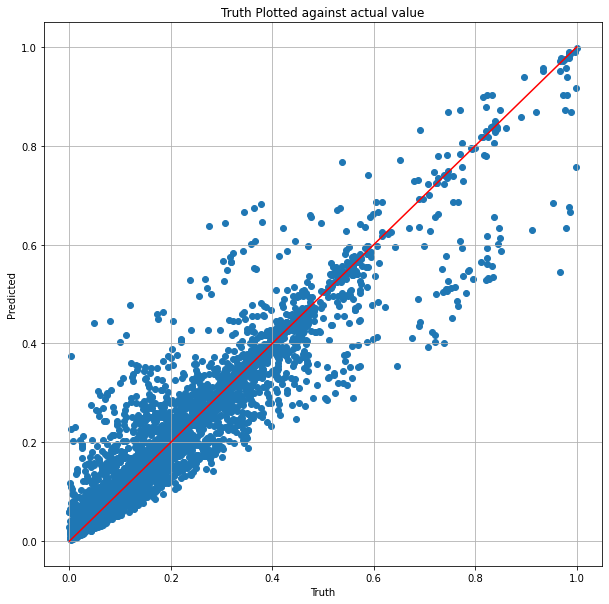

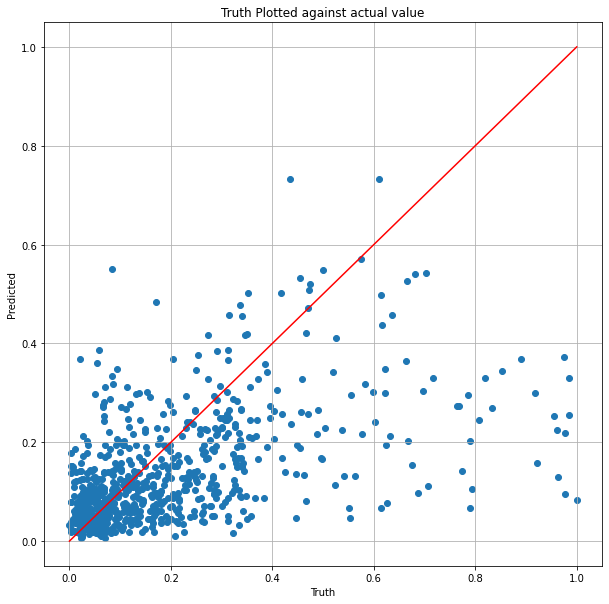

In [80]:
KNNmodel = neighbors.KNeighborsRegressor(n_neighbors = 2)
KNNmodel.fit(x_train, y_train)  #fit the model
test_pred_knn = KNNmodel.predict(x_test) #make prediction on test set
train_pred_knn = KNNmodel.predict(x_train)
plotRegression(y_train, train_pred_knn)
plotRegression(y_test, test_pred_knn)

In [81]:
print( r2_score(y_train, train_pred_knn) )
print( r2_score(y_test, test_pred_knn) )

0.8892696646921777
0.21619089790172186


## Try fitting the data with RandomForestRegressors
<hr>

In [42]:
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
regressor.fit(x_train, y_train)

<ipython-input-42-932c021c312b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=0)

In [44]:
# Training data r^2 value 
y_train_pred = regressor.predict(x_train)
r2_score(y_train, y_train_pred)

0.9756360942460424

In [46]:
# testing data r^2 value 
y_test_pred = regressor.predict(x_test)
r2_score(y_test, y_test_pred)

0.4453393122202427

In [48]:
def computeAverageError(pred, y):
    err = []
    for i in range(len(pred)):
        err.append(abs((y[i] - pred[i])/(y[i] + 1e-6)))

    return sum(err)/ len(err)

In [50]:
computeAverageError(y_test_pred, y_test)

array([211.01155655])

In [52]:
computeAverageError(y_train_pred, y_train)

array([3.3383068])

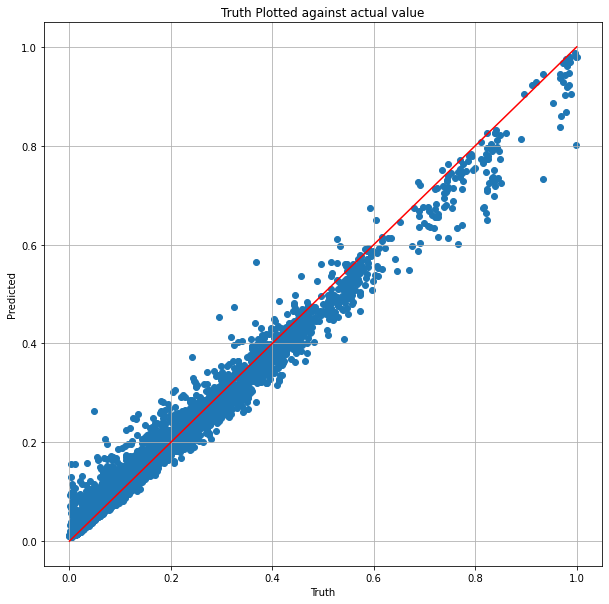

In [54]:
plotRegression(y_train, y_train_pred)

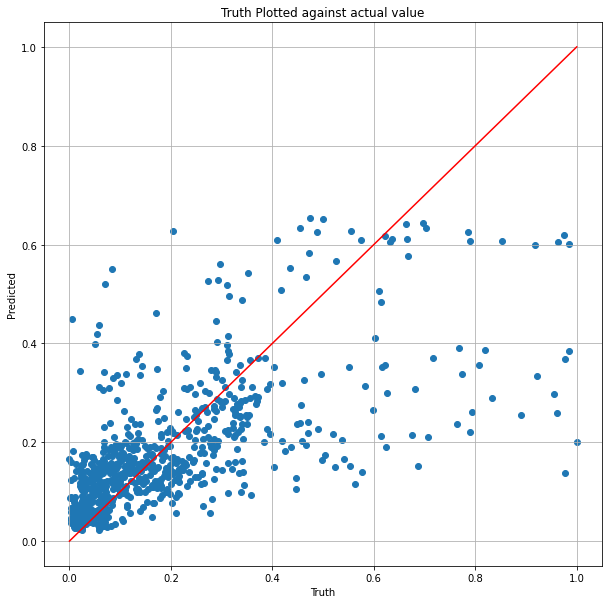

In [55]:
plotRegression(y_test, y_test_pred)

## Support Vector Regression 
<hr>

In [56]:
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# x_train = sc_X.fit_transform(x_train)
# x_test = sc_X.fit_transform(x_test)
# y_train = sc_y.fit_transform(y_train)
# y_test = sc_y.fit_transform(y_test)

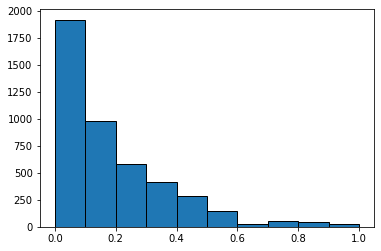

In [57]:
plt.figure()
plt.hist(y_train, edgecolor='black')
plt.show()

### Before transform, data has range () after transform, from from (-1,5) (Using Standard scaler)
### Using MinMaxScaler gives range between 0-1


In [58]:
# Reshape Y 
print('Before reshaping: ')
print(y_train.shape)
print(y_test.shape)

y_train = y_train.flatten()
y_test = y_test.flatten()
print('After reshaping: ')
print(y_train.shape)
print(y_test.shape)

Before reshaping: 
(4476, 1)
(791, 1)
After reshaping: 
(4476,)
(791,)


In [59]:
regressorSVR = SVR(kernel='rbf')
regressorSVR.fit(x_train, y_train)

SVR()

In [60]:
y_train_pred_svr = regressorSVR.predict(x_train)
y_test_pred_svr = regressorSVR.predict(x_test)

In [61]:
print(r2_score(y_train, y_train_pred_svr))
print(r2_score(y_test, y_test_pred_svr))

0.7293601119238622
0.2993561071087152


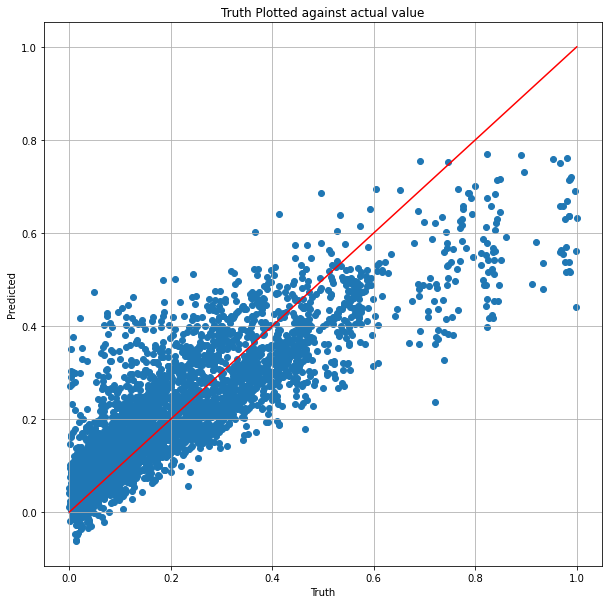

In [62]:
plotRegression(truth=y_train, pred=y_train_pred_svr)

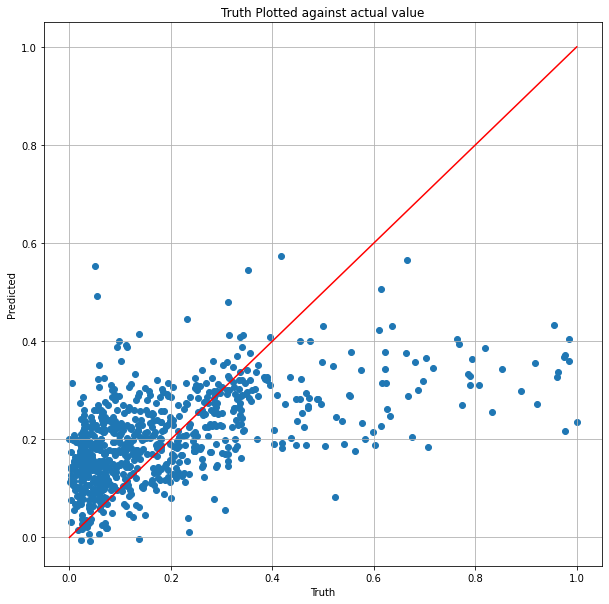

In [63]:
plotRegression(truth=y_test, pred=y_test_pred_svr)

## Using keras RNN
<hr>

In [64]:
import tensorflow as tf 
from tensorflow import keras
from keras import backend as K
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.layers.experimental import preprocessing

In [65]:
# not sure if this is right. 
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [66]:
#LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(x.shape[1],1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
# optimizer 
opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-5)
# compile
model.compile(loss='mean_squared_error', optimizer=opt, metrics=[coeff_determination])

In [67]:
# ann Model
model = Sequential()
model.add(Dense(20, input_dim=x.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, input_dim=x.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, input_dim=x.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))
# optimizer 
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# compile
model.compile(loss='mean_squared_error', optimizer=opt, metrics=[coeff_determination])

In [68]:
def plot_loss(history):
  plt.figure()
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()
  plt.figure()
  plt.plot(history.history['coeff_determination'], label='R^2')
  plt.plot(history.history['val_coeff_determination'], label='validation R^2')
  plt.xlabel('Epoch')
  plt.ylabel('R^2')
  plt.legend()
  plt.show()

In [69]:
x_train = x_train.reshape(-1,x.shape[1],)
x_test = x_test.reshape(-1,x.shape[1],)

In [70]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

Epoch 1/100
35/35 - 0s - loss: 0.0399 - coeff_determination: -2.1168e-01 - val_loss: 0.0355 - val_coeff_determination: -5.4543e-02
Epoch 2/100
35/35 - 0s - loss: 0.0250 - coeff_determination: 0.2485 - val_loss: 0.0305 - val_coeff_determination: 0.0841
Epoch 3/100
35/35 - 0s - loss: 0.0229 - coeff_determination: 0.3106 - val_loss: 0.0285 - val_coeff_determination: 0.1513
Epoch 4/100
35/35 - 0s - loss: 0.0219 - coeff_determination: 0.3370 - val_loss: 0.0303 - val_coeff_determination: 0.1131
Epoch 5/100
35/35 - 0s - loss: 0.0203 - coeff_determination: 0.3857 - val_loss: 0.0283 - val_coeff_determination: 0.1658
Epoch 6/100
35/35 - 0s - loss: 0.0195 - coeff_determination: 0.4128 - val_loss: 0.0284 - val_coeff_determination: 0.1642
Epoch 7/100
35/35 - 0s - loss: 0.0192 - coeff_determination: 0.4138 - val_loss: 0.0265 - val_coeff_determination: 0.2082
Epoch 8/100
35/35 - 0s - loss: 0.0187 - coeff_determination: 0.4357 - val_loss: 0.0286 - val_coeff_determination: 0.1566
Epoch 9/100
35/35 - 0s

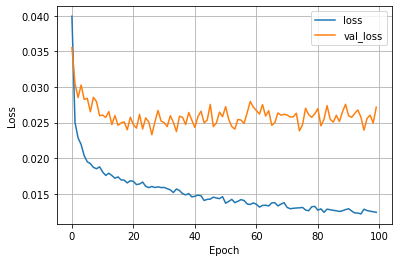

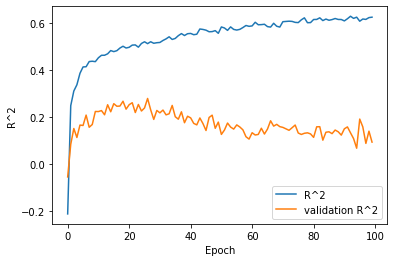

In [71]:
history= model.fit(x=x_train, y=y_train, epochs=100, validation_data=(x_test, y_test),batch_size=128,verbose=2)
plot_loss(history)

In [72]:
y_pred_train_LSTM = model.predict(x_train)
print(r2_score(y_train, y_pred_train_LSTM))
y_pred_test_LSTM = model.predict(x_test)
print(r2_score(y_test, y_pred_test_LSTM))

0.6376196422611231
0.2762479569770411


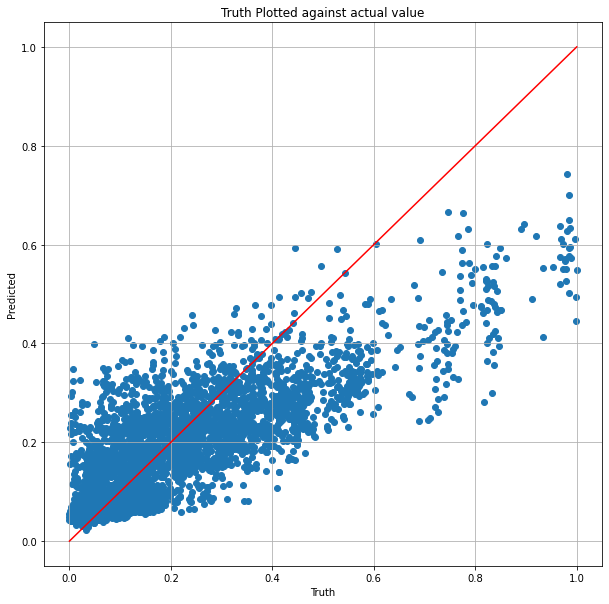

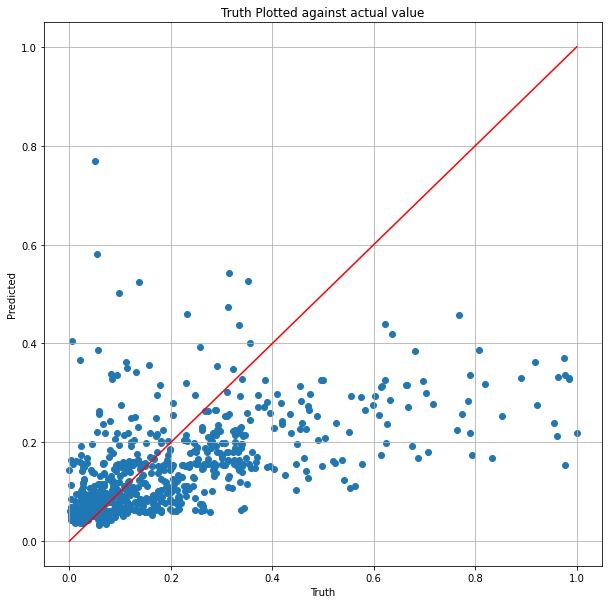

In [73]:
plotRegression(y_train, y_pred_train_LSTM)
plotRegression(y_test, y_pred_test_LSTM)